In [73]:
import pandas as pd

order_report = pd.read_csv('Order Report.csv')
sku_master = pd.read_csv('SKU Master.csv')
pincode_mapping = pd.read_csv('pincodes.csv')
courier_invoice = pd.read_csv('Invoice.csv')
courier_company_rates = pd.read_csv('Courier Company - Rates.csv')

print("Order Report:")
print(order_report.head())
print("\n SKU Master:")
print(sku_master.head())
print("\n Pincode Mapping")
print(pincode_mapping.head())
print("\n Courier Invoice:")
print(courier_invoice.head())
print("\n Courier Company rates:")
print(courier_company_rates.head())


Order Report:
   ExternOrderNo            SKU  Order Qty  Unnamed: 3  Unnamed: 4
0     2001827036  8904223818706        1.0         NaN         NaN
1     2001827036  8904223819093        1.0         NaN         NaN
2     2001827036  8904223819109        1.0         NaN         NaN
3     2001827036  8904223818430        1.0         NaN         NaN
4     2001827036  8904223819277        1.0         NaN         NaN

 SKU Master:
             SKU  Weight (g)  Unnamed: 2  Unnamed: 3  Unnamed: 4
0  8904223815682         210         NaN         NaN         NaN
1  8904223815859         165         NaN         NaN         NaN
2  8904223815866         113         NaN         NaN         NaN
3  8904223815873          65         NaN         NaN         NaN
4  8904223816214         120         NaN         NaN         NaN

 Pincode Mapping
   Warehouse Pincode  Customer Pincode Zone  Unnamed: 3  Unnamed: 4
0             121003            507101    d         NaN         NaN
1             121003      

In [3]:
#check for missing values

print("\n Missing values in Website Order Report:")
print(order_report.isnull().sum())
print("\n Missing values in SKU master:")
print(sku_master.isnull().sum())
print("\n Missing values in Pincode Mapping:")
print(pincode_mapping.isnull().sum())
print("\n Missing values in Courier Invoice:")
print(courier_invoice.isnull().sum())
print("\n Missing values in Courier company rates:")
print(courier_company_rates.isnull().sum())


 Missing values in Website Order Report:
ExternOrderNo      0
SKU                0
Order Qty          0
Unnamed: 3       400
Unnamed: 4       400
dtype: int64

 Missing values in SKU master:
SKU            0
Weight (g)     0
Unnamed: 2    66
Unnamed: 3    66
Unnamed: 4    66
dtype: int64

 Missing values in Pincode Mapping:
Warehouse Pincode      0
Customer Pincode       0
Zone                   0
Unnamed: 3           124
Unnamed: 4           124
dtype: int64

 Missing values in Courier Invoice:
AWB Code                0
Order ID                0
Charged Weight          0
Warehouse Pincode       0
Customer Pincode        0
Zone                    0
Type of Shipment        0
Billing Amount (Rs.)    0
dtype: int64

 Missing values in Courier company rates:
fwd_a_fixed         0
fwd_a_additional    0
fwd_b_fixed         0
fwd_b_additional    0
fwd_c_fixed         0
fwd_c_additional    0
fwd_d_fixed         0
fwd_d_additional    0
fwd_e_fixed         0
fwd_e_additional    0
rto_a_fixed   

In [5]:
#Clean the data

In [75]:
# Remove unnamed columns from the website order Report DataFrame
order_report = order_report.drop(columns=['Unnamed: 3', 'Unnamed: 4'])

# Remove unnamed columns from the SKU master DataFrame
sku_master = sku_master.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Remove unnamed columns from the Pincode Mapping Dataframe
pincode_mapping = pincode_mapping.drop(columns=['Unnamed: 3', 'Unnamed: 4'])

In [77]:
# after clean data 
print("\n Missing values in Website Order Report:")
print(order_report.isnull().sum())
print("\n Missing values in SKU master:")
print(sku_master.isnull().sum())
print("\n Missing values in Pincode Mapping:")
print(pincode_mapping.isnull().sum())
print("\n Missing values in Courier Invoice:")
print(courier_invoice.isnull().sum())
print("\n Missing values in Courier company rates:")
print(courier_company_rates.isnull().sum())


 Missing values in Website Order Report:
ExternOrderNo    0
SKU              0
Order Qty        0
dtype: int64

 Missing values in SKU master:
SKU           0
Weight (g)    0
dtype: int64

 Missing values in Pincode Mapping:
Warehouse Pincode    0
Customer Pincode     0
Zone                 0
dtype: int64

 Missing values in Courier Invoice:
AWB Code                0
Order ID                0
Charged Weight          0
Warehouse Pincode       0
Customer Pincode        0
Zone                    0
Type of Shipment        0
Billing Amount (Rs.)    0
dtype: int64

 Missing values in Courier company rates:
fwd_a_fixed         0
fwd_a_additional    0
fwd_b_fixed         0
fwd_b_additional    0
fwd_c_fixed         0
fwd_c_additional    0
fwd_d_fixed         0
fwd_d_additional    0
fwd_e_fixed         0
fwd_e_additional    0
rto_a_fixed         0
rto_a_additional    0
rto_b_fixed         0
rto_b_additional    0
rto_c_fixed         0
rto_c_additional    0
rto_d_fixed         0
rto_d_additional 

In [79]:
# Merge the Order Report and SKU Master based on SKU
merged_data = pd.merge(order_report, sku_master, on='SKU')
print(merged_data.head())

   ExternOrderNo            SKU  Order Qty  Weight (g)
0     2001827036  8904223818706        1.0         127
1     2001827036  8904223819093        1.0         150
2     2001827036  8904223819109        1.0         100
3     2001827036  8904223818430        1.0         165
4     2001827036  8904223819277        1.0         350


In [81]:
# Rename the " ExternOrderNo" column to "Order ID" in the merged_data DataFrame
merged_data = merged_data.rename(columns={'ExternOrderNo': 'Order ID'})

In [83]:
print(merged_data.head())

     Order ID            SKU  Order Qty  Weight (g)
0  2001827036  8904223818706        1.0         127
1  2001827036  8904223819093        1.0         150
2  2001827036  8904223819109        1.0         100
3  2001827036  8904223818430        1.0         165
4  2001827036  8904223819277        1.0         350


In [85]:
xyz_courier = pincode_mapping.drop_duplicates(subset=['Customer Pincode'])
courier_xyz = courier_invoice[['Order ID', 'Customer Pincode', 'Type of Shipment']]
pincodes = courier_xyz.merge(xyz_courier, on='Customer Pincode')
print(pincodes.head())

     Order ID  Customer Pincode Type of Shipment  Warehouse Pincode Zone
0  2001806232            507101  Forward charges             121003    d
1  2001806273            486886  Forward charges             121003    d
2  2001806408            532484  Forward charges             121003    d
3  2001806458            143001  Forward charges             121003    b
4  2001807012            515591  Forward charges             121003    d


In [87]:
# merge the pin codes with the main dataframe

merged2 = merged_data.merge(pincodes, on='Order ID')


In [89]:
print(merged2.head())

     Order ID            SKU  Order Qty  Weight (g)  Customer Pincode  \
0  2001827036  8904223818706        1.0         127            173213   
1  2001827036  8904223819093        1.0         150            173213   
2  2001827036  8904223819109        1.0         100            173213   
3  2001827036  8904223818430        1.0         165            173213   
4  2001827036  8904223819277        1.0         350            173213   

  Type of Shipment  Warehouse Pincode Zone  
0  Forward charges             121003    e  
1  Forward charges             121003    e  
2  Forward charges             121003    e  
3  Forward charges             121003    e  
4  Forward charges             121003    e  


In [91]:
#calculate the weight in kilograms by dividing the ‘Weight (g)’ column in the ‘merged2’ DataFrame by 1000:
merged2['Weights (Kgs)'] = merged2['Weight (g)'] / 1000

In [93]:
# calculate the weight slabs:

def weight_slab(weight):
    i = round(weight % 1, 1)
    if i == 0.0:
        return weight
    elif i > 0.5:
        return int(weight) + 1.0
    else:
        return int(weight) + 0.5
merged2['Weight Slab (KG)'] = merged2['Weights (Kgs)'].apply(weight_slab)
courier_invoice['Weight Slab Charged by Courier Company'] = (courier_invoice['Charged Weight']).apply(weight_slab)


In [95]:
# Rename the columns to prepare the desired dataframe:
courier_invoice = courier_invoice.rename(columns={'Zone': 'Delivery Zone Charged by Courier Company'})
merged2 = merged2.rename(columns={'Zone' : 'Delivery Zone As Per XYZ'})
merged2 = merged2.rename(columns={'Weight Slab (KG)' : 'Weight Slab As Per XYZ'})



In [97]:
#calculate the expected charges:

total_expected_charge = []
for _, row in merged2.iterrows():
    fwd_category = 'fwd_' + row['Delivery Zone As Per XYZ']
    fwd_fixed = courier_company_rates.at[0, fwd_category + '_fixed']
    fwd_additional = courier_company_rates.at[0,fwd_category + '_additional']
    rto_category = 'rto_' + row['Delivery Zone As Per XYZ']
    rto_fixed = courier_company_rates.at[0, rto_category + '_fixed']
    rto_additional = courier_company_rates.at[0, rto_category + '_additional']


    weight_slab = row['Weight Slab As Per XYZ']

    if row['Type of Shipment'] == 'Forward charges':
        additional_weight = max(0,(weight_slab - 0.5) / 0.5)
        total_expected_charge.append(fwd_fixed + additional_weight * fwd_additional)
    elif row['Type of Shipment'] == 'Forward and RTO charges':
        additional_weight = max(0, (weight_slab - 0.5) / 0.5)
        total_expected_charge.append(fwd_fixed + additional_weight * (fwd_additional + rto_additional))
    else:
        total_expected_charge.append(0)
merged2['Expected charge as per XYZ'] = total_expected_charge
print(merged2.head())

     Order ID            SKU  Order Qty  Weight (g)  Customer Pincode  \
0  2001827036  8904223818706        1.0         127            173213   
1  2001827036  8904223819093        1.0         150            173213   
2  2001827036  8904223819109        1.0         100            173213   
3  2001827036  8904223818430        1.0         165            173213   
4  2001827036  8904223819277        1.0         350            173213   

  Type of Shipment  Warehouse Pincode Delivery Zone As Per XYZ  Weights (Kgs)  \
0  Forward charges             121003                        e          0.127   
1  Forward charges             121003                        e          0.150   
2  Forward charges             121003                        e          0.100   
3  Forward charges             121003                        e          0.165   
4  Forward charges             121003                        e          0.350   

   Weight Slab As Per XYZ  Expected charge as per XYZ  
0                 

In [99]:
# Now let’s merge it with the courier invoice to display the final dataframe:
merged_output = merged2.merge(courier_invoice, on='Order ID')
print(merged_output.head())


     Order ID            SKU  Order Qty  Weight (g)  Customer Pincode_x  \
0  2001827036  8904223818706        1.0         127              173213   
1  2001827036  8904223819093        1.0         150              173213   
2  2001827036  8904223819109        1.0         100              173213   
3  2001827036  8904223818430        1.0         165              173213   
4  2001827036  8904223819277        1.0         350              173213   

  Type of Shipment_x  Warehouse Pincode_x Delivery Zone As Per XYZ  \
0    Forward charges               121003                        e   
1    Forward charges               121003                        e   
2    Forward charges               121003                        e   
3    Forward charges               121003                        e   
4    Forward charges               121003                        e   

   Weights (Kgs)  Weight Slab As Per XYZ  Expected charge as per XYZ  \
0          0.127                     0.5                

In [101]:
# calculate the differences in charges and expected charges for each order:

df_diff = merged_output
df_diff['Difference (Rs.)'] = df_diff['Billing Amount (Rs.)']

df_new = df_diff[['Order ID', 'Difference (Rs.)', 'Expected charge as per XYZ']]

print(df_new.head())

     Order ID  Difference (Rs.)  Expected charge as per XYZ
0  2001827036             117.9                        56.6
1  2001827036             117.9                        56.6
2  2001827036             117.9                        56.6
3  2001827036             117.9                        56.6
4  2001827036             117.9                        56.6


In [103]:
# Now let’s summarize the accuracy of B2B courier charges based on the charged prices and expected prices:



In [105]:
# Calculate the total orders in each category
total_correctly_charged = len(df_new[df_new['Difference (Rs.)'] == 0])
total_overcharged = len(df_new[df_new['Difference (Rs.)'] > 0])
total_undercharged = len(df_new[df_new['Difference (Rs.)'] < 0])

# calculate the total amount in each category
amount_overcharged = abs(df_new[df_new['Difference (Rs.)'] > 0]['Difference (Rs.)'].sum())
amount_undercharged = df_new[df_new['Difference (Rs.)'] < 0]['Difference (Rs.)'].sum()
amount_correctly_charged = df_new[df_new['Difference (Rs.)'] == 0]['Expected charge as per XYZ'].sum()


# Create a new DataFrame for the summary
summary_data = {'Description': ['Total Orders where ABC has been correctly charged',
                                'Total Orders where ABC has been overcharged',
                                'Total Orders where ABC has been undercharged'],
                'Count': [total_correctly_charged, total_overcharged, total_undercharged],
                'Amount (Rs.)': [amount_correctly_charged, amount_overcharged, amount_undercharged]}

df_summary = pd.DataFrame(summary_data)

print(df_summary)

                                         Description  Count  Amount (Rs.)
0  Total Orders where ABC has been correctly charged      0           0.0
1        Total Orders where ABC has been overcharged    401       49422.5
2       Total Orders where ABC has been undercharged      0           0.0


In [107]:
# visualize the proportion of errors

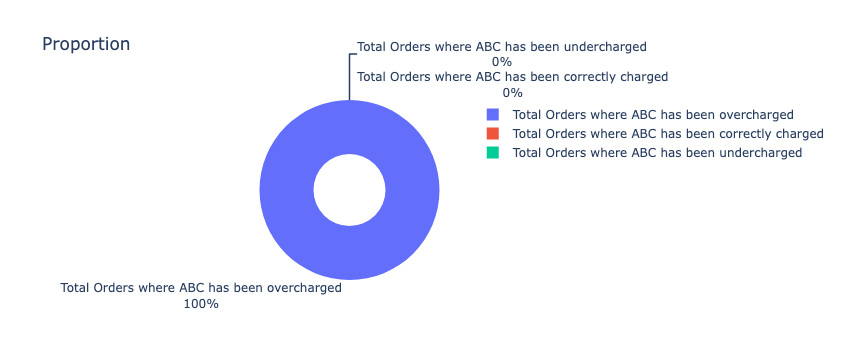

In [109]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Pie(labels=df_summary['Description'],
                            values=df_summary['Count'],
                            textinfo='label+percent',
                            hole=0.4))
fig.update_layout(title='Proportion')

fig.show()